# Remuestreo Bootstrap

El método de Bootstrap se utiliza para estimar la media poblacional y cuantificar el grado de confianza que se puede tener de el estadísitico de la muestra. El método se basa en generar $m$ nuevas muestras, de igual tamaño que la muestra original, tomando valores aleatorios de la muestra original. Tomando la media de cada resampleo se obtiene una distribución de la media muestral (normal). A partir de esta distribución se estima la media poblacional y el intervalo de confidencia del estimador.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dado un set de datos calculamos su media y visualizamos la distribución

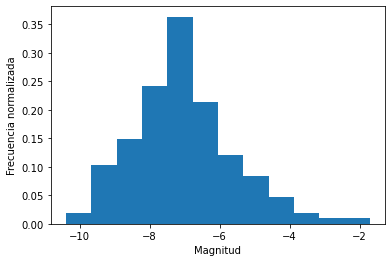

In [2]:
#Cargamos el archivo con la muestra. 
data = np.genfromtxt('cumulos_globulares.dat', usecols=6)

# data tiene NaNs, así que usamos solo los numéricos.
data = data[~np.isnan(data)]
n = data.shape[0]
mu = np.average(data)

plt.hist(data,density=True,bins=int(np.sqrt(n)))
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia normalizada')
plt.show()

Realizamos $m$ remuestreos Bootstrap y calculamos sus medias.

In [3]:
m = 1000
boot = np.zeros((n,m))
mus  = np.ones(m+1)*mu
for i in range(m):
    boot[:,i] = data[np.random.randint(0, n-1,n)]
    mus[i+1] = np.average(boot[:,i])
mu_b = np.average(mus)

Vemos la distribución resultante, con la media de la muestra original en linea de trazos y la media Bootstrap en línea continua

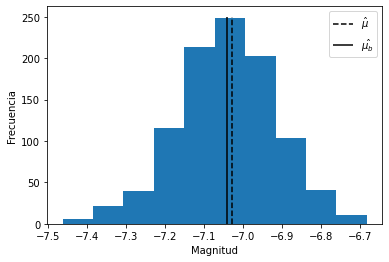

In [4]:
plt.hist(mus)
plt.vlines(x=mu,ymin=0,ymax=m/4,linestyles='dashed', label='$\hat{\mu}$')
plt.vlines(x=mu_b,ymin=0,ymax=m/4, label='$\hat{\mu_b}$')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Estudiamos el crecimiento del intervalo de confidencia $(\hat{\mu_b}-\epsilon,\hat{\mu_b}+\epsilon)$ en función del nivel de significancia $\alpha$. El gráfico empieza con $\alpha = 50\%$ porque niveles de significancia menores son poco deseables.

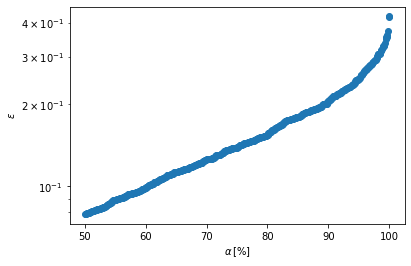

In [5]:
epsilon = np.sort(abs(mus-mu_b))
alpha = np.arange(1,m+2)/(m+1)

plt.scatter(alpha[m//2:]*100,epsilon[m//2:])
plt.semilogy()
plt.xlabel(r'$\alpha\,[\%]$')
plt.ylabel('$\epsilon$')
plt.show()